In [53]:
from scipy import io
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from scipy.io import loadmat

from __future__ import division
from __future__ import print_function

import os
import sys
from time import time

import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import matplotlib.font_manager

from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.deep_svdd import DeepSVDD
from pyod.models.ocsvm import OCSVM

from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score
	
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))
# supress warnings for clean output
import warnings

warnings.filterwarnings("ignore")


In [41]:
random_state = np.random.RandomState(42)

In [70]:
classifiers = {
    'LOF' : LOF(),
    'IF' : IForest(),
    'AE' : AutoEncoder(hidden_neurons=[32, 16, 2, 2, 16, 32], epochs=10, verbose=0),
    'OCSVM' : OCSVM(),
}

## 1. outlier 비율별 데이터셋의 성능 비교 [1%, 5%, 10%, 30%]

1 fitting LOF
2 fitting IF
3 fitting AE
313/313 [==============================] - 0s 1ms/step
4 fitting OCSVM


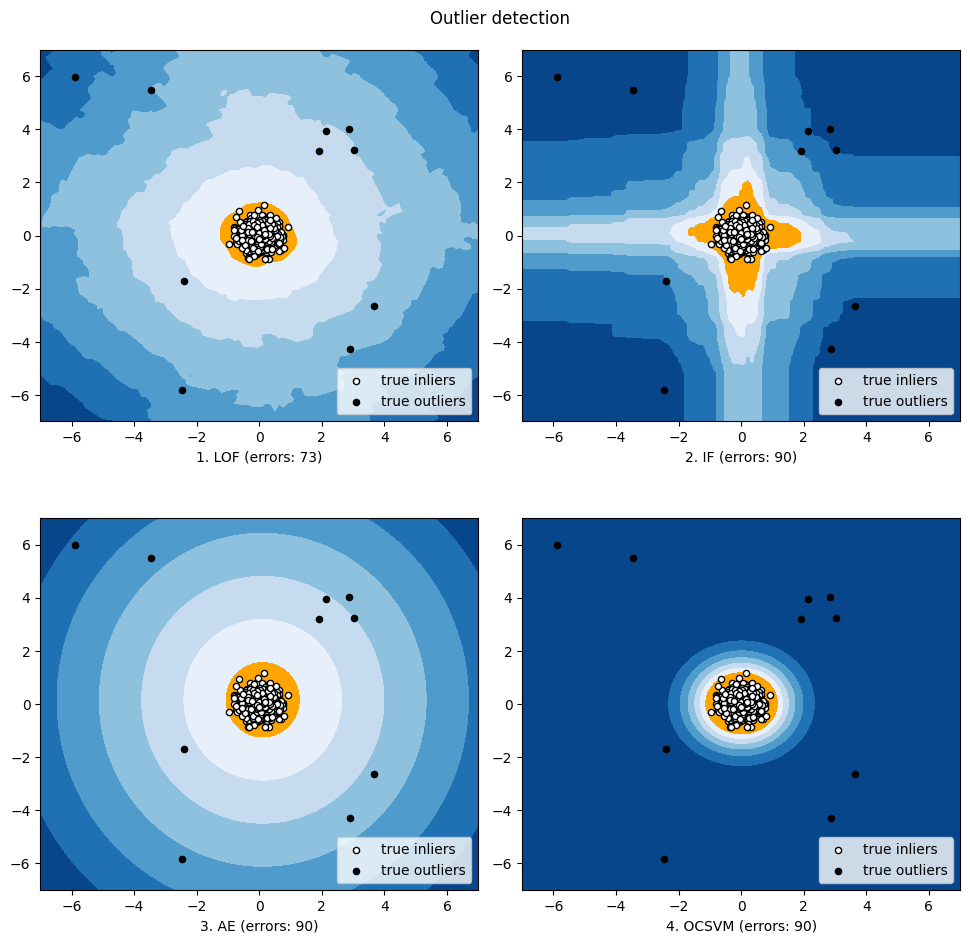

In [49]:
# Fit the models with the generated data and 
# compare model performances
# Define the number of inliers and outliers
n_samples = 1000
outliers_fraction = 0.01
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(10, 10))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        clf.fit(X)
        scores_pred = clf.decision_function(X) * -1
        y_pred = clf.predict(X)
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        # a = subplot.contour(xx, yy, Z, levels=[threshold],
        #                     linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [
                # a.collections[0],
                b, c],
            [
                # 'learned decision function',
                'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()

1 fitting LOF
2 fitting IF
3 fitting AE
313/313 [==============================] - 0s 1ms/step
4 fitting OCSVM


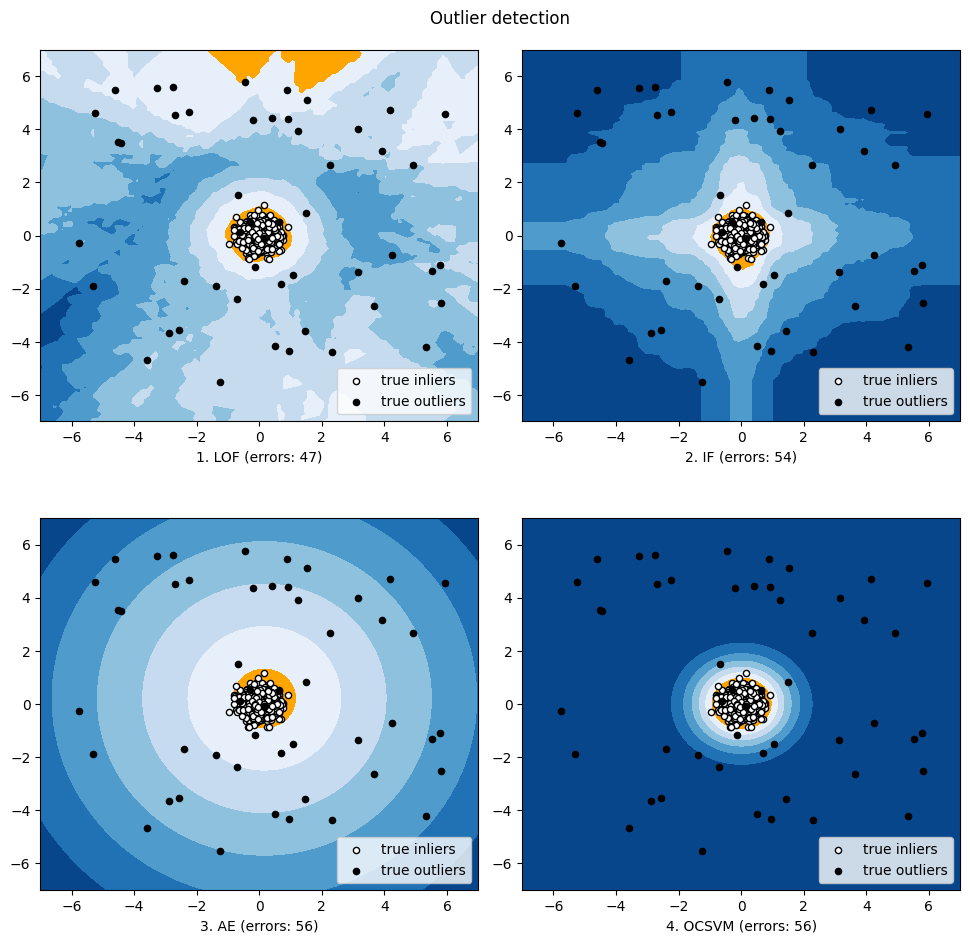

In [44]:
# Fit the models with the generated data and 
# compare model performances
# Define the number of inliers and outliers
n_samples = 1000
outliers_fraction = 0.05
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(10, 10))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        clf.fit(X)
        scores_pred = clf.decision_function(X) * -1
        y_pred = clf.predict(X)
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        # a = subplot.contour(xx, yy, Z, levels=[threshold],
        #                     linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [
                # a.collections[0],
                b, c],
            [
                # 'learned decision function',
                'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()

1 fitting LOF
2 fitting IF
3 fitting AE
313/313 [==============================] - 0s 1ms/step
4 fitting OCSVM


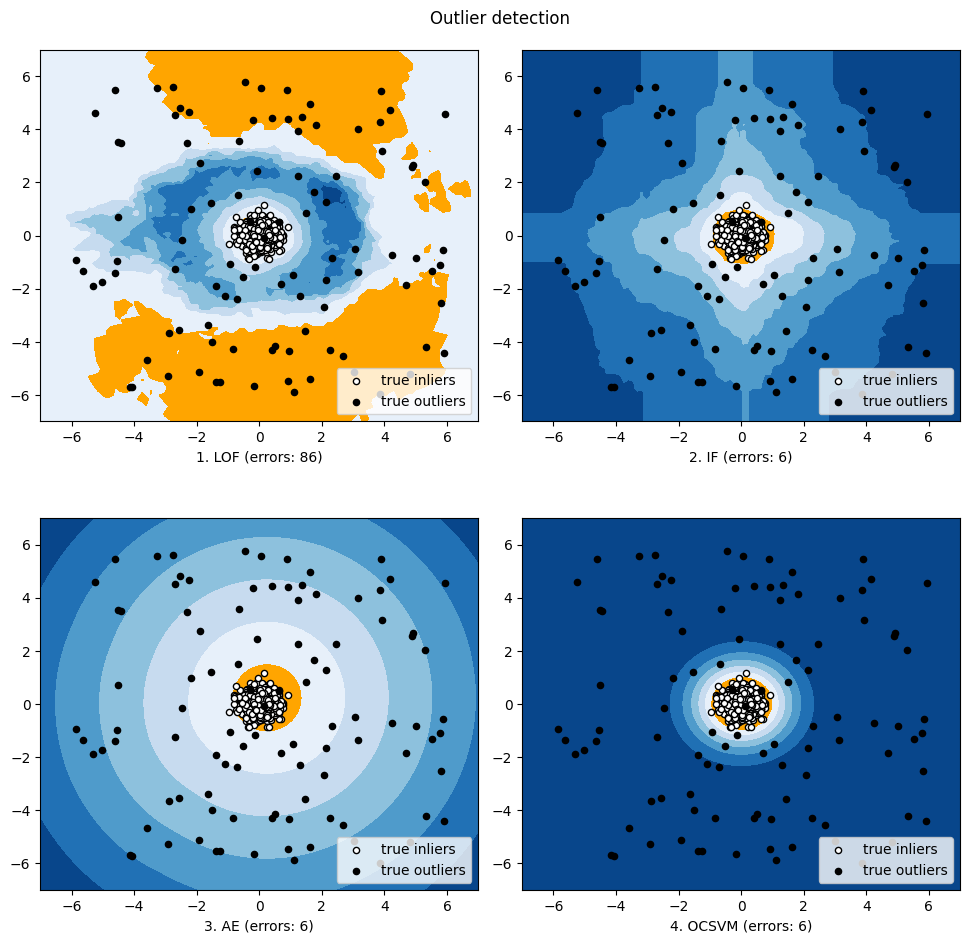

In [45]:
# Fit the models with the generated data and 
# compare model performances
# Define the number of inliers and outliers
n_samples = 1000
outliers_fraction = 0.1
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(10, 10))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        clf.fit(X)
        scores_pred = clf.decision_function(X) * -1
        y_pred = clf.predict(X)
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        # a = subplot.contour(xx, yy, Z, levels=[threshold],
        #                     linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [
                # a.collections[0],
                b, c],
            [
                # 'learned decision function',
                'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()

1 fitting LOF
2 fitting IF
3 fitting AE
313/313 [==============================] - 0s 1ms/step
4 fitting OCSVM


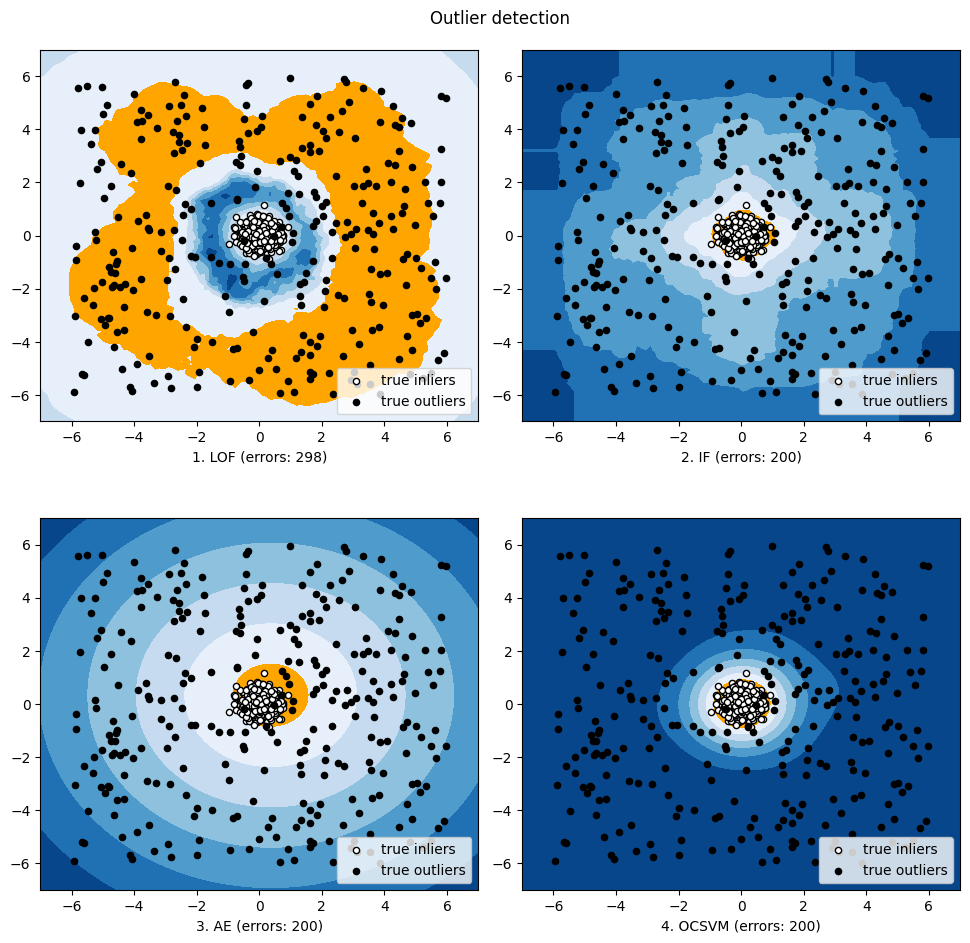

In [47]:
# Fit the models with the generated data and 
# compare model performances
# Define the number of inliers and outliers
n_samples = 1000
outliers_fraction = 0.3
clusters_separation = [0]

# Compare given detectors under given settings
# Initialize the data
xx, yy = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    # Data generation
    X1 = 0.3 * np.random.randn(n_inliers // 2, 2) - offset
    X2 = 0.3 * np.random.randn(n_inliers // 2, 2) + offset
    X = np.r_[X1, X2]
    # Add outliers
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]

    # Fit the model
    plt.figure(figsize=(10, 10))
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        print(i + 1, 'fitting', clf_name)
        # fit the data and tag outliers
        clf.fit(X)
        scores_pred = clf.decision_function(X) * -1
        y_pred = clf.predict(X)
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        n_errors = (y_pred != ground_truth).sum()
        # plot the levels lines and the points

        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 2, i + 1)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        # a = subplot.contour(xx, yy, Z, levels=[threshold],
        #                     linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [
                # a.collections[0],
                b, c],
            [
                # 'learned decision function',
                'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
    plt.suptitle("Outlier detection")
plt.show()

## 2. 실제 데이터의 outlier 비율별 모델 성능 비교 [1.2%, 6.25%, 9.6%, 32%]

In [50]:
mat_file_list = [     
                 'satimage-2.mat',
                 'letter.mat',
                 'cardio.mat',
                 'satellite.mat',
]

In [51]:
df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc',
              'LOF', 'IF', 'AE', 'OCSVM']
roc_df = pd.DataFrame(columns=df_columns)
prn_df = pd.DataFrame(columns=df_columns)
time_df = pd.DataFrame(columns=df_columns)

In [71]:
for mat_file in mat_file_list:
    print("\n... Processing", mat_file, '...')
    mat = loadmat(os.path.join('data', mat_file))

    X = mat['X']
    y = mat['y'].ravel()
    outliers_fraction = np.count_nonzero(y) / len(y)
    outliers_percentage = round(outliers_fraction * 100, ndigits=4)

    # construct containers for saving results
    roc_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    prn_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    time_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]

    # 60% data for training and 40% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=random_state)

    # standardizing data for processing
    X_train_norm, X_test_norm = standardizer(X_train, X_test)

    for clf_name, clf in classifiers.items():
        t0 = time()
        clf.fit(X_train_norm)
        test_scores = clf.decision_function(X_test_norm)
        t1 = time()
        duration = round(t1 - t0, ndigits=4)
        time_list.append(duration)

        roc = round(roc_auc_score(y_test, test_scores), ndigits=4)
        prn = round(precision_n_scores(y_test, test_scores), ndigits=4)

        print('{clf_name} ROC:{roc}, precision @ rank n:{prn}, '
              'execution time: {duration}s'.format(
            clf_name=clf_name, roc=roc, prn=prn, duration=duration))

        roc_list.append(roc)
        prn_list.append(prn)

    temp_df = pd.DataFrame(time_list).transpose()
    temp_df.columns = df_columns
    time_df = pd.concat([time_df, temp_df], axis=0)

    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns
    roc_df = pd.concat([roc_df, temp_df], axis=0)

    temp_df = pd.DataFrame(prn_list).transpose()
    temp_df.columns = df_columns
    prn_df = pd.concat([prn_df, temp_df], axis=0)


... Processing satimage-2.mat ...
LOF ROC:0.6109, precision @ rank n:0.1667, execution time: 0.5252s
IF ROC:0.9814, precision @ rank n:0.7778, execution time: 0.5253s
37/37 [==============================] - 0s 1ms/step
AE ROC:0.9433, precision @ rank n:0.7222, execution time: 6.1071s
OCSVM ROC:0.9881, precision @ rank n:0.8889, execution time: 1.1695s

... Processing letter.mat ...
LOF ROC:0.855, precision @ rank n:0.2963, execution time: 0.1023s
IF ROC:0.5772, precision @ rank n:0.0741, execution time: 0.3742s
10/10 [==============================] - 0s 2ms/step
AE ROC:0.4353, precision @ rank n:0.0741, execution time: 2.5813s
OCSVM ROC:0.5183, precision @ rank n:0.1111, execution time: 0.1444s

... Processing cardio.mat ...
LOF ROC:0.5431, precision @ rank n:0.1613, execution time: 0.064s
IF ROC:0.9103, precision @ rank n:0.3548, execution time: 0.4425s
12/12 [==============================] - 0s 1ms/step
AE ROC:0.9552, precision @ rank n:0.5806, execution time: 3.3347s
OCSVM ROC:0

In [56]:
time_df

,Data,#Samples,# Dimensions,Outlier Perc,LOF,IF,AE,OCSVM
0,satimage-2,5803,36,1.2235,0.4838,0.5587,5.3474,0.7752
0,letter,1600,32,6.25,0.0467,0.3339,2.7424,0.0539
0,cardio,1831,21,9.6122,0.0506,0.3393,2.9235,0.0835
0,satellite,6435,36,31.6395,0.487,0.5407,5.5657,0.9477


In [57]:
roc_df

,Data,#Samples,# Dimensions,Outlier Perc,LOF,IF,AE,OCSVM
0,satimage-2,5803,36,1.2235,0.5699,0.9969,0.9827,0.9997
0,letter,1600,32,6.25,0.8631,0.5551,0.4845,0.5918
0,cardio,1831,21,9.6122,0.5898,0.93,0.9476,0.9271
0,satellite,6435,36,31.6395,0.5605,0.701,0.6123,0.6629


In [58]:
prn_df

,Data,#Samples,# Dimensions,Outlier Perc,LOF,IF,AE,OCSVM
0,satimage-2,5803,36,1.2235,0.1111,0.8148,0.7778,0.8889
0,letter,1600,32,6.25,0.3529,0.0,0.0,0.0588
0,cardio,1831,21,9.6122,0.1923,0.5385,0.6154,0.5256
0,satellite,6435,36,31.6395,0.3777,0.5834,0.5019,0.5295


## 3. 모델별 hyperparameter tuning 결과

#### 1) LOF
- n_neighbors = [10,20,30]
- leaf_size = [20,30,40]

In [64]:
classifiers['LOF']

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=False, p=2)

In [107]:
LOF_params = {
    'n_neighbors': [10,20,30],
    'leaf_size': [20,30,40]
}


In [85]:
df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc']
roc_df = pd.DataFrame(columns=df_columns)
prn_df = pd.DataFrame(columns=df_columns)
time_df = pd.DataFrame(columns=df_columns)

for mat_file in mat_file_list:
    print("\n... Processing", mat_file, '...')
    mat = loadmat(os.path.join('data', mat_file))

    X = mat['X']
    y = mat['y'].ravel()
    outliers_fraction = np.count_nonzero(y) / len(y)
    outliers_percentage = round(outliers_fraction * 100, ndigits=2)

    # construct containers for saving results
    roc_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    prn_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    time_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]

    # 60% data for training and 40% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=random_state)

    # standardizing data for processing
    X_train_norm, X_test_norm = standardizer(X_train, X_test)
    
    df_columns_hyper = []
    for i in LOF_params['n_neighbors']:
        for j in LOF_params['leaf_size']:
            clf = LOF(n_neighbors=i, leaf_size=j)
            t0 = time()
            clf.fit(X_train_norm)
            test_scores = clf.decision_function(X_test_norm)
            t1 = time()
            duration = round(t1 - t0, ndigits=4)
            time_list.append(duration)

            roc = round(roc_auc_score(y_test, test_scores), ndigits=2)
            prn = round(precision_n_scores(y_test, test_scores), ndigits=2)

            df_columns_hyper.append('n_neighbors={i}/leaf_size={j}'.format(i=i, j=j))
            roc_list.append(roc)
            prn_list.append(prn)

    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns + df_columns_hyper
    roc_df = pd.concat([roc_df, temp_df], axis=0)

    temp_df = pd.DataFrame(prn_list).transpose()
    temp_df.columns = df_columns + df_columns_hyper
    prn_df = pd.concat([prn_df, temp_df], axis=0)


... Processing satimage-2.mat ...

... Processing letter.mat ...

... Processing cardio.mat ...

... Processing satellite.mat ...


In [102]:
roc_df.T

,0,0,0,0
Data,satimage-2,letter,cardio,satellite
#Samples,5803,1600,1831,6435
# Dimensions,36,32,21,36
Outlier Perc,1.22,6.25,9.61,31.64
n_neighbors=10/leaf_size=20,0.57,0.9,0.48,0.54
n_neighbors=10/leaf_size=30,0.57,0.9,0.48,0.54
n_neighbors=10/leaf_size=40,0.57,0.9,0.48,0.54
n_neighbors=20/leaf_size=20,0.53,0.89,0.52,0.56
n_neighbors=20/leaf_size=30,0.53,0.89,0.52,0.56
n_neighbors=20/leaf_size=40,0.53,0.89,0.52,0.56


In [106]:
prn_df.T

,0,0,0,0
Data,satimage-2,letter,cardio,satellite
#Samples,5803,1600,1831,6435
# Dimensions,36,32,21,36
Outlier Perc,1.22,6.25,9.61,31.64
n_neighbors=10/leaf_size=20,0.14,0.45,0.14,0.36
n_neighbors=10/leaf_size=30,0.14,0.45,0.14,0.36
n_neighbors=10/leaf_size=40,0.14,0.45,0.14,0.36
n_neighbors=20/leaf_size=20,0.07,0.36,0.18,0.38
n_neighbors=20/leaf_size=30,0.07,0.36,0.18,0.38
n_neighbors=20/leaf_size=40,0.07,0.36,0.18,0.38


#### 2) IF
- n_estimators = [50,100,200]
- max_samples = [128,256,512]

In [108]:
classifiers['IF']

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [109]:
IF_params = {
    'n_estimators': [50,100,200],
    'max_samples': [128,256,512]
}


In [112]:
df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc']
roc_df = pd.DataFrame(columns=df_columns)
prn_df = pd.DataFrame(columns=df_columns)
time_df = pd.DataFrame(columns=df_columns)

for mat_file in mat_file_list:
    print("\n... Processing", mat_file, '...')
    mat = loadmat(os.path.join('data', mat_file))

    X = mat['X']
    y = mat['y'].ravel()
    outliers_fraction = np.count_nonzero(y) / len(y)
    outliers_percentage = round(outliers_fraction * 100, ndigits=2)

    # construct containers for saving results
    roc_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    prn_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    time_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]

    # 60% data for training and 40% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=random_state)

    # standardizing data for processing
    X_train_norm, X_test_norm = standardizer(X_train, X_test)
    
    df_columns_hyper = []
    for i in IF_params['n_estimators']:
        for j in IF_params['max_samples']:
            clf = IForest(n_estimators=i, max_samples=j)
            t0 = time()
            clf.fit(X_train_norm)
            test_scores = clf.decision_function(X_test_norm)
            t1 = time()
            duration = round(t1 - t0, ndigits=4)
            time_list.append(duration)

            roc = round(roc_auc_score(y_test, test_scores), ndigits=2)
            prn = round(precision_n_scores(y_test, test_scores), ndigits=2)

            df_columns_hyper.append('n_estimators={i}/max_samples={j}'.format(i=i, j=j))
            roc_list.append(roc)
            prn_list.append(prn)

    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns + df_columns_hyper
    roc_df = pd.concat([roc_df, temp_df], axis=0)

    temp_df = pd.DataFrame(prn_list).transpose()
    temp_df.columns = df_columns + df_columns_hyper
    prn_df = pd.concat([prn_df, temp_df], axis=0)


... Processing satimage-2.mat ...

... Processing letter.mat ...

... Processing cardio.mat ...

... Processing satellite.mat ...


In [113]:
roc_df.T

,0,0,0,0
Data,satimage-2,letter,cardio,satellite
#Samples,5803,1600,1831,6435
# Dimensions,36,32,21,36
Outlier Perc,1.22,6.25,9.61,31.64
n_estimators=50/max_samples=128,1.0,0.43,0.89,0.66
n_estimators=50/max_samples=256,1.0,0.56,0.93,0.73
n_estimators=50/max_samples=512,1.0,0.59,0.88,0.69
n_estimators=100/max_samples=128,1.0,0.53,0.93,0.67
n_estimators=100/max_samples=256,1.0,0.57,0.91,0.67
n_estimators=100/max_samples=512,1.0,0.57,0.91,0.66


In [114]:
prn_df.T

,0,0,0,0
Data,satimage-2,letter,cardio,satellite
#Samples,5803,1600,1831,6435
# Dimensions,36,32,21,36
Outlier Perc,1.22,6.25,9.61,31.64
n_estimators=50/max_samples=128,1.0,0.0,0.35,0.53
n_estimators=50/max_samples=256,0.91,0.05,0.47,0.55
n_estimators=50/max_samples=512,0.91,0.1,0.35,0.54
n_estimators=100/max_samples=128,0.91,0.0,0.53,0.52
n_estimators=100/max_samples=256,0.91,0.05,0.35,0.54
n_estimators=100/max_samples=512,1.0,0.1,0.44,0.53


#### 3) AE
- hidden_neurons = [[64,16,16,64],
                    [64,8,8,64],
                    [64,4,4,64]]
- hidden_activation = ['relu', 'tanh']

In [115]:
classifiers['AE']

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=10,
      hidden_activation='relu', hidden_neurons=[32, 16, 2, 2, 16, 32],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7f1fdc452b80>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=0)

In [116]:
AE_params = {
    'hidden_neurons': [[64,16,16,64],
                    [64,8,8,64],
                    [64,4,4,64]],
    'hidden_activation': ['relu', 'tanh']
}


In [117]:
df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc']
roc_df = pd.DataFrame(columns=df_columns)
prn_df = pd.DataFrame(columns=df_columns)
time_df = pd.DataFrame(columns=df_columns)

for mat_file in mat_file_list:
    print("\n... Processing", mat_file, '...')
    mat = loadmat(os.path.join('data', mat_file))

    X = mat['X']
    y = mat['y'].ravel()
    outliers_fraction = np.count_nonzero(y) / len(y)
    outliers_percentage = round(outliers_fraction * 100, ndigits=2)

    # construct containers for saving results
    roc_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    prn_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    time_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]

    # 60% data for training and 40% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=random_state)

    # standardizing data for processing
    X_train_norm, X_test_norm = standardizer(X_train, X_test)
    
    df_columns_hyper = []
    for i in AE_params['hidden_neurons']:
        for j in AE_params['hidden_activation']:
            clf = AutoEncoder(hidden_neurons=i, hidden_activation=j, epochs=30, verbose=0)
            t0 = time()
            clf.fit(X_train_norm)
            test_scores = clf.decision_function(X_test_norm)
            t1 = time()
            duration = round(t1 - t0, ndigits=4)
            time_list.append(duration)

            roc = round(roc_auc_score(y_test, test_scores), ndigits=2)
            prn = round(precision_n_scores(y_test, test_scores), ndigits=2)

            df_columns_hyper.append('hidden_neurons={i}/hidden_activation={j}'.format(i=i, j=j))
            roc_list.append(roc)
            prn_list.append(prn)

    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns + df_columns_hyper
    roc_df = pd.concat([roc_df, temp_df], axis=0)

    temp_df = pd.DataFrame(prn_list).transpose()
    temp_df.columns = df_columns + df_columns_hyper
    prn_df = pd.concat([prn_df, temp_df], axis=0)


... Processing satimage-2.mat ...
37/37 [==============================] - 0s 1ms/step

... Processing letter.mat ...
10/10 [==============================] - 0s 1ms/step

... Processing cardio.mat ...
12/12 [==============================] - 0s 1ms/step

... Processing satellite.mat ...
41/41 [==============================] - 0s 1ms/step


In [118]:
roc_df.T

,0,0,0,0
Data,satimage-2,letter,cardio,satellite
#Samples,5803,1600,1831,6435
# Dimensions,36,32,21,36
Outlier Perc,1.22,6.25,9.61,31.64
"hidden_neurons=[64, 16, 16, 64]/hidden_activation=relu",0.99,0.66,0.94,0.62
"hidden_neurons=[64, 16, 16, 64]/hidden_activation=tanh",0.99,0.66,0.94,0.62
"hidden_neurons=[64, 8, 8, 64]/hidden_activation=relu",0.99,0.66,0.94,0.62
"hidden_neurons=[64, 8, 8, 64]/hidden_activation=tanh",0.99,0.66,0.94,0.63
"hidden_neurons=[64, 4, 4, 64]/hidden_activation=relu",0.99,0.66,0.94,0.62
"hidden_neurons=[64, 4, 4, 64]/hidden_activation=tanh",0.99,0.66,0.94,0.62


In [120]:
prn_df.T

,0,0,0,0
Data,satimage-2,letter,cardio,satellite
#Samples,5803,1600,1831,6435
# Dimensions,36,32,21,36
Outlier Perc,1.22,6.25,9.61,31.64
"hidden_neurons=[64, 16, 16, 64]/hidden_activation=relu",0.83,0.18,0.66,0.5
"hidden_neurons=[64, 16, 16, 64]/hidden_activation=tanh",0.83,0.18,0.66,0.5
"hidden_neurons=[64, 8, 8, 64]/hidden_activation=relu",0.83,0.18,0.66,0.49
"hidden_neurons=[64, 8, 8, 64]/hidden_activation=tanh",0.83,0.18,0.66,0.52
"hidden_neurons=[64, 4, 4, 64]/hidden_activation=relu",0.83,0.18,0.66,0.5
"hidden_neurons=[64, 4, 4, 64]/hidden_activation=tanh",0.83,0.18,0.66,0.5


#### 4) OCSVM
- kernel = ['poly','rbf','sigmoid']
- nu = [0.25,0.5,0.75]

In [121]:
classifiers['OCSVM']

OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [122]:
OCSVM_params = {
    'kernel': ['poly','rbf','sigmoid'],
    'nu': [0.25,0.5,0.75]
}

In [123]:
df_columns = ['Data', '#Samples', '# Dimensions', 'Outlier Perc']
roc_df = pd.DataFrame(columns=df_columns)
prn_df = pd.DataFrame(columns=df_columns)
time_df = pd.DataFrame(columns=df_columns)

for mat_file in mat_file_list:
    print("\n... Processing", mat_file, '...')
    mat = loadmat(os.path.join('data', mat_file))

    X = mat['X']
    y = mat['y'].ravel()
    outliers_fraction = np.count_nonzero(y) / len(y)
    outliers_percentage = round(outliers_fraction * 100, ndigits=2)

    # construct containers for saving results
    roc_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    prn_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    time_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]

    # 60% data for training and 40% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=random_state)

    # standardizing data for processing
    X_train_norm, X_test_norm = standardizer(X_train, X_test)
    
    df_columns_hyper = []
    for i in OCSVM_params['kernel']:
        for j in OCSVM_params['nu']:
            clf = OCSVM(kernel=i, nu=j)
            t0 = time()
            clf.fit(X_train_norm)
            test_scores = clf.decision_function(X_test_norm)
            t1 = time()
            duration = round(t1 - t0, ndigits=4)
            time_list.append(duration)

            roc = round(roc_auc_score(y_test, test_scores), ndigits=2)
            prn = round(precision_n_scores(y_test, test_scores), ndigits=2)

            df_columns_hyper.append('kernel={i}/nu={j}'.format(i=i, j=j))
            roc_list.append(roc)
            prn_list.append(prn)

    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns + df_columns_hyper
    roc_df = pd.concat([roc_df, temp_df], axis=0)

    temp_df = pd.DataFrame(prn_list).transpose()
    temp_df.columns = df_columns + df_columns_hyper
    prn_df = pd.concat([prn_df, temp_df], axis=0)


... Processing satimage-2.mat ...

... Processing letter.mat ...

... Processing cardio.mat ...

... Processing satellite.mat ...


In [127]:
roc_df.T

,0,0,0,0
Data,satimage-2,letter,cardio,satellite
#Samples,5803,1600,1831,6435
# Dimensions,36,32,21,36
Outlier Perc,1.22,6.25,9.61,31.64
kernel=poly/nu=0.25,0.02,0.79,0.18,0.48
kernel=poly/nu=0.5,0.08,0.83,0.15,0.52
kernel=poly/nu=0.75,0.03,0.82,0.13,0.54
kernel=rbf/nu=0.25,0.99,0.68,0.88,0.62
kernel=rbf/nu=0.5,0.99,0.69,0.91,0.68
kernel=rbf/nu=0.75,0.99,0.68,0.92,0.66


In [125]:
prn_df.T

,0,0,0,0
Data,satimage-2,letter,cardio,satellite
#Samples,5803,1600,1831,6435
# Dimensions,36,32,21,36
Outlier Perc,1.22,6.25,9.61,31.64
kernel=poly/nu=0.25,0.0,0.45,0.03,0.42
kernel=poly/nu=0.5,0.05,0.5,0.0,0.44
kernel=poly/nu=0.75,0.0,0.5,0.03,0.47
kernel=rbf/nu=0.25,0.95,0.27,0.29,0.49
kernel=rbf/nu=0.5,0.95,0.27,0.41,0.54
kernel=rbf/nu=0.75,0.95,0.23,0.44,0.54
